In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

In [4]:
df = pd.read_csv("./P39-Minimizing-Churn-Data/churn_data.csv")

In [4]:
df.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [5]:
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [6]:
df = df[pd.notnull(df['age'])]

In [7]:
df = df.drop(["credit_score",'rewards_earned'],axis =1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones       

In [6]:
df2 = df.drop(['user','churn'],axis =1)

In [ ]:
fig = plt.figure(figsize = (15,12))
plt.suptitle('Histogram of Numerical Columns', fontsize = 20)
for i in range(1,df2.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i-1])
    
    vals = np.size(df2.iloc[:,i-1].unique())
    plt.hist(df2.iloc[:,i-1],bins = vals)
plt.tight_layout(rect = [0,0.03,0.95])

In [5]:
df[df["waiting_4_loan"]==1]["churn"].value_counts()

0    27
1     8
Name: churn, dtype: int64

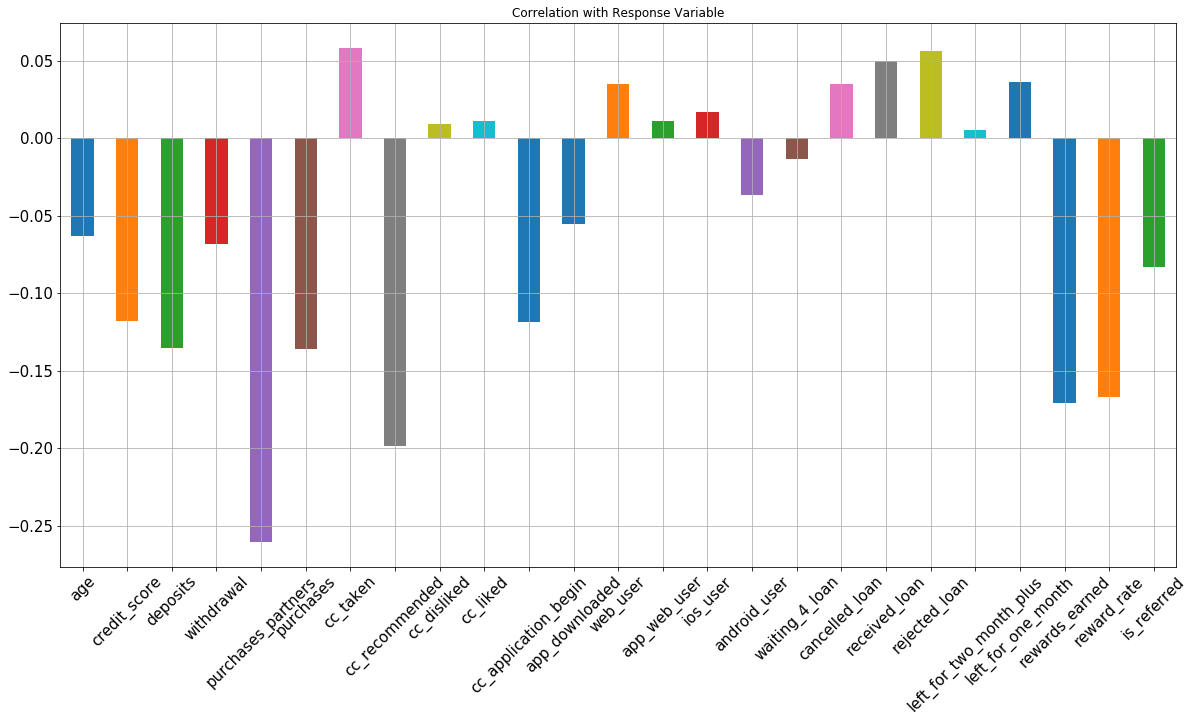

In [8]:
df2.drop(['housing','payment_type','registered_phones','zodiac_sign'],axis =1).corrwith(df['churn']).plot.bar(figsize = (20,10),title = 'Correlation with Response Variable',fontsize = 15, rot =45, grid =True)

In [10]:
sns.set(style = 'white')
corr = df.drop(['user','churn'],axis =1).corr()

In [11]:
corr

,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
age,1.000000,0.044147,0.088757,0.044177,-0.000943,0.088769,0.077199,0.095860,0.005577,0.019512,...,-0.001354,0.004164,-0.003713,-0.001808,0.011030,-0.022500,0.034534,0.130108,0.086167,-0.001557
credit_score,0.044147,1.000000,0.042217,0.003599,0.047121,0.043147,0.023657,0.121587,0.014645,0.025876,...,-0.011358,0.020527,0.068690,0.092706,0.017313,0.011698,0.012985,0.142385,0.147955,-0.034227
deposits,0.088757,0.042217,1.000000,0.488910,0.326611,0.998554,-0.047049,0.376146,-0.014677,-0.012108,...,0.040068,-0.002926,0.011388,-0.009431,-0.018497,0.048394,-0.011347,0.248797,0.267669,0.229911
withdrawal,0.044177,0.003599,0.488910,1.000000,0.223712,0.488293,-0.040651,0.187452,-0.011102,-0.003194,...,0.047131,0.003175,-0.002571,-0.006234,-0.009823,0.032098,-0.009962,0.094038,0.125400,0.211576
purchases_partners,-0.000943,0.047121,0.326611,0.223712,1.000000,0.326551,-0.101491,0.594526,-0.035329,-0.033009,...,0.072208,0.000093,0.014025,-0.015026,-0.030981,0.082374,-0.032060,0.403507,0.432897,0.301465
purchases,0.088769,0.043147,0.998554,0.488293,0.326551,1.000000,-0.047072,0.376689,-0.014579,-0.012191,...,0.039691,-0.002710,0.011694,-0.009266,-0.018333,0.048678,-0.011504,0.249345,0.268158,0.230054
cc_taken,0.077199,0.023657,-0.047049,-0.040651,-0.101491,-0.047072,1.000000,0.115116,0.182656,0.168531,...,0.042729,-0.006078,0.004688,0.046763,0.006389,-0.015994,0.085826,0.148875,0.149169,-0.025012
cc_recommended,0.095860,0.121587,0.376146,0.187452,0.594526,0.376689,0.115116,1.000000,0.048081,0.055575,...,0.126025,-0.018080,0.014208,0.044994,-0.037952,0.045691,0.037753,0.915712,0.877571,0.241523
cc_disliked,0.005577,0.014645,-0.014677,-0.011102,-0.035329,-0.014579,0.182656,0.048081,1.000000,0.095500,...,0.025732,-0.002093,0.011350,0.014678,-0.002854,-0.012921,0.033595,0.060708,0.060712,-0.009287
cc_liked,0.019512,0.025876,-0.012108,-0.003194,-0.033009,-0.012191,0.168531,0.055575,0.095500,1.000000,...,0.025384,-0.001983,0.002678,0.021604,-0.001629,-0.007147,0.007707,0.065415,0.064475,-0.012217


In [80]:
df_final = pd.read_csv('./P39-Minimizing-Churn-Data/new_churn_data.csv')

In [81]:
user_identifier = df_final['userid']
df_final = df_final.drop('userid',axis =1)

In [21]:
df_final.columns

Index(['churn', 'age', 'rent_or_own', 'trivia_played', 'trivia_shared_results',
       'trivia_view_unlocked', 'trivia_view_results', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android', 'used_ios',
       'more_than_one_mobile_device', 'payfreq', 'loan_pending',
       'withdrawn_application', 'paid_off_loan', 'did_not_accept_funding',
       'zodiac_sign', 'un_linked_account', 're_linked_account',
       'cash_back_engagement', 'has_referred'],
      dtype='object')

In [82]:
df_final['rent_or_own'].value_counts()

na    24767
R     19621
O      3691
Name: rent_or_own, dtype: int64

In [83]:
df_final = pd.get_dummies(df_final)
# To avoid the correlation introduced in one-hot Encoding
df_final = df_final.drop(['rent_or_own_na','zodiac_sign_na','payfreq_na'],axis =1)
#df_final.columns

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(df_final.drop('churn',axis =1),df_final['churn'],test_size = 0.2, random_state= 0)

In [86]:
# Balancing the training set, so number of postive examples and negative exaples are about the same
pos_index = y_train[y_train.values==1].index
neg_index = y_train[y_train.values==0].index

if len(pos_index)>len(neg_index):
    higher = pos_index
    lower = neg_index
else: 
    higher = neg_index
    lower = pos_index
random.seed(0)
higher = np.random.choice(higher,size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((higher,lower))

X_train = X_train.loc[new_indexes,:]
y_train = y_train[new_indexes]


In [87]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test =X_test2
X_train.head()

,age,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
27981,-0.402139,-0.245267,-0.289929,-0.003107,-0.242373,-0.172457,-0.358703,-0.045321,-0.073647,-0.406523,...,-0.311552,-0.159682,-0.293088,-0.309842,-0.298888,-0.293405,-0.290413,-0.28695,3.405317,-0.312039
44127,-0.198328,-0.357922,-0.289929,0.367485,-0.357106,-0.172457,-0.507233,-0.045321,-0.073647,-0.652941,...,-0.311552,-0.159682,-0.293088,3.227449,-0.298888,-0.293405,-0.290413,-0.28695,-0.293658,-0.312039
32512,-0.504045,0.993942,3.767216,1.158084,1.019694,-0.172457,1.046617,-0.045321,-0.073647,0.004175,...,-0.311552,-0.159682,-0.293088,-0.309842,-0.298888,-0.293405,3.443370,-0.28695,-0.293658,-0.312039
37106,0.515010,-0.357922,-0.289929,-0.250169,-0.357106,-0.172457,-0.758591,-0.045321,-0.073647,-0.488662,...,-0.311552,-0.159682,-0.293088,-0.309842,-0.298888,-0.293405,-0.290413,-0.28695,-0.293658,-0.312039
46109,-0.605950,-0.357922,-0.289929,-0.596056,-0.357106,-0.172457,-1.032799,-0.045321,-0.073647,-0.652941,...,-0.311552,-0.159682,-0.293088,-0.309842,-0.298888,-0.293405,-0.290413,-0.28695,-0.293658,-0.312039


In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Index(['age', 'trivia_played', 'trivia_view_unlocked', 'trivia_view_results',
       'cards_viewed', 'has_used_mobile', 'has_used_web', 'used_android',
       'more_than_one_mobile_device', 'loan_pending', 'withdrawn_application',
       'paid_off_loan', 'did_not_accept_funding', 're_linked_account',
       'cash_back_engagement', 'has_referred', 'rent_or_own_R',
       'payfreq_Bi-Weekly', 'payfreq_Monthly', 'payfreq_Semi-Monthly'],
      dtype='object')

In [92]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = lr,X= X_train, y=y_train,cv =10, verbose =4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  ................................................................
[CV] .................................... , score=0.639, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.641, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.640, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.644, total=   0.2s
[CV]  ................................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.642, total=   0.2s
[CV]  ................................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.650, total=   0.3s
[CV]  ................................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.652, total=   0.3s
[CV]  ................................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.635, total=   0.2s
[CV]  ................................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.643, total=   0.4s
[CV]  ................................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................................... , score=0.631, total=   0.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.0s finished


In [93]:
accuracies. mean()

0.6417388594143326

In [94]:
accuracies.std()

0.006172178284577693

In [101]:
# Feature Selection
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr,20)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[ True  True False  True  True False  True False False False  True  True
  True False  True  True  True  True  True False  True  True  True False
  True  True  True  True False False False False False False False False
 False False False False False]
[ 1  1  6  1  1  9  1  4 21  3  1  1  1 10  1  1  1  1  1  2  1  1  1 18
  1  1  1  1  8 19 20 14 16  5 12 17 22 11 15  7 13]


Index(['age', 'trivia_played', 'trivia_view_unlocked', 'trivia_view_results',
       'cards_viewed', 'has_used_mobile', 'has_used_web', 'used_android',
       'more_than_one_mobile_device', 'loan_pending', 'withdrawn_application',
       'paid_off_loan', 'did_not_accept_funding', 're_linked_account',
       'cash_back_engagement', 'has_referred', 'rent_or_own_R',
       'payfreq_Bi-Weekly', 'payfreq_Monthly', 'payfreq_Semi-Monthly'],
      dtype='object')